### Creating a Globe Visualization

This notebook shows how how to take a shapefile showing the path of the [2017 Solar Eclipse](https://svs.gsfc.nasa.gov/4518) and create a globe visualization.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install cartopy rioxarray

In [ ]:
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests
import rioxarray as rxr
import shapely
import zipfile

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [ ]:
# Get the eclipse shapefiles
path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
penumbra_shapefile = 'penum17'

shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile, penumbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

# Get the Blue Marble basemap image
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/bluemarble/'
basemap_file = 'eo_base_2020_clean_geo_resampled.tif'
download(data_url + basemap_file)

#### Data Pre-Processing

In [ ]:
path_shapefile_path = os.path.join(
    data_folder, path_shapefile + '.shp')
umbra_shapefile_path = os.path.join(
    data_folder, umbra_shapefile + '.shp')
penumbra_shapefile_path = os.path.join(
    data_folder, penumbra_shapefile + '.shp')

path_gdf = gpd.read_file(path_shapefile_path)
umbra_gdf = gpd.read_file(umbra_shapefile_path)
penumbra_gdf = gpd.read_file(penumbra_shapefile_path)

Choose a Orthographic Projection centered on the continental USA. convrt the CartoPy projection to a GeoPandas projection and reproject the data layers.

In [ ]:
cartopy_crs = ccrs.Orthographic(-100, 45)
crs= cartopy_crs.proj4_init

penumbra_gdf_reprojected = penumbra_gdf.to_crs(crs)
umbra_gdf_reproejcted = umbra_gdf.to_crs(crs)
path_gdf_reprojected = path_gdf.to_crs(crs)

Read the Blue Marble basemap image

In [ ]:
basemapth_path = os.path.join(data_folder, basemap_file)
basemap_ds = rxr.open_rasterio(basemapth_path)

#### Create a Globe Visualization

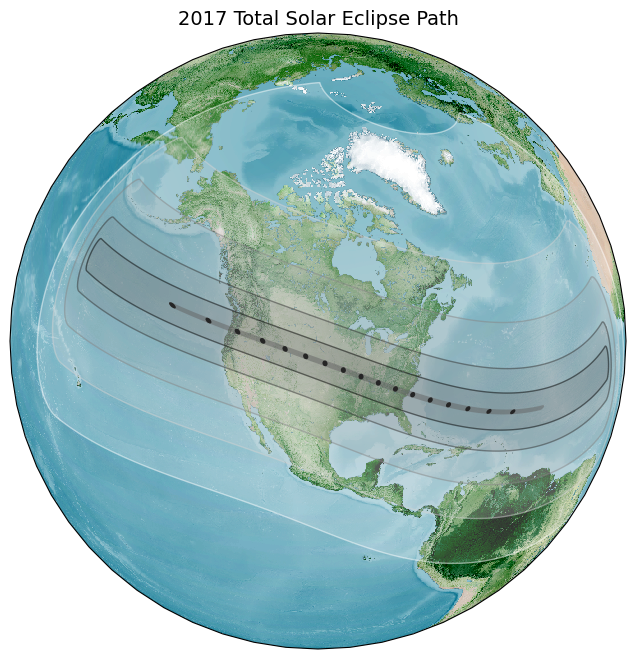

In [56]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy_crs})
fig.set_size_inches(8, 8)

# Plot the basemap
basemap_ds.plot.imshow(
    ax=ax,
    transform=ccrs.PlateCarree(),
    robust=True)

# Plot the DataFrames
penumbra_gdf.to_crs(crs).plot(
    ax=ax,
    column='Obscur',
    cmap='Greys',
    linewidth=1,
    edgecolor='none',
    alpha=0.2
)

penumbra_gdf.to_crs(crs).plot(
    ax=ax,
    column='Obscur',
    cmap='Greys',
    linewidth=1,
    facecolor='none',
    alpha=0.5
)

path_gdf.to_crs(crs).plot(
    ax=ax,
    facecolor='#636363',
    edgecolor='none',
    alpha=0.5,
)

umbra_gdf.to_crs(crs).plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')


plt.title('2017 Total Solar Eclipse Path', fontsize=14)

plt.show()